In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

officers = pd.read_pickle('./dataframes/off_inc_df.pkl')
civs = pd.read_pickle('./dataframes/civ_inc_df.pkl')

# Technical Review: Police Use of Force 2016

## Goal

The objective of this project was to analyze recently released data on police use of force in the state of California and identify potential areas for improvement in law enforcement agencies (LEAs) regarding police conduct and use of force policies.

## Background
The main dataset for this project comes from the California Department of Justice (DOJ) and Bayes Impact. Bayes Impact is a NGO based in San Francisco that uses data to solve some of "the world's biggest problems". In joint effort with the California DOJ, Bayes Impact built "a digital tool (URSUS) for the California DOJ that allows law enforcement agencies in California to digitally collect, track and report use of force that results in serious bodily injury or death." In 2016, all 800 California police departments were mandated to use the software. The recently released data for 2016 is available to the public.

For more information on Bayes Impact and URSUS : https://www.bayesimpact.org/focus/justice

## Limitations
The main limitation of this data is the strict and narrow definition of "use of force". As mentioned above, agencies are only required to report data on "incidents that result in serious bodily injury or death of either the civilian or the officer and all incidents where there is a discharge of a firearm." In addition to that, very few Law Enforcement Agencies (LEAs) report data on things such as police officer trainings (i.e. the amount of training hours received or whether or not police officers received training on a given topic). Having data like this could give us more insight into why we see specific trends or patterns in the data.

## Findings

- Demographics
    - Race
- Incidents by county
    - Top counties with incidents of UoF
    - Top counties with high death rates in incidents of UoF
- Incidents involving civilians with irregular mental status
    - Drug/alcohol impairment
    - Mental disability/developmental disability
- Mapping of incidents
- Logistic Regression predicting for `Injury_Level: Death`
    
    


### Demographics

#### Civilian Race:

Race breakdown of civilians involved in incidents of use of force:

|                        | CA Pop (%) | UoF Civilian Pop (%) | Difference (%) |
|:----------------------:|----------|-----------|--------------|
| **Hispanic**           | 38.9     | 42.2      | +3.3         |
| **White**              | 37.7     | 30.0      | -7.7         |
| **Black**              | 6.5      | 19.6      | **+13.1**        |
| **Asian/Pacific Islander**| 15.3     | 3.6       | -11.7        |

----

   - *Black civilians are involved in nearly 20% of UoF incidents, despite only making up 6.5% of the total population of CA. Civilians of Asian/Pacific Islander and White race/ethnicity seem to be much less involved in UoF incidents in comparison to their respective representation of the total population.*
   
   *Demographics of CA source: https://www.census.gov/quickfacts/CA*

#### Officer Race:

Race breakdown of officers involved in incidents of use of force:

|                            | UoF Police Pop (%) |
|:----------------------:    |-----------|
| **Hispanic**               | 31.7      |
| **White**                  | 56.5      |
| **Black**                  | 3.4       |
| **Asian/Pacific Islander** | 4.8       |

- *The same comparison as above would have to be made on CA police racial demographic data which unfortunately is not available for almost all LEA's in California. Ideally - were this data available - the racial breakdown would be equal to the population's.*



#### Civilian and Officer Age Breakdown

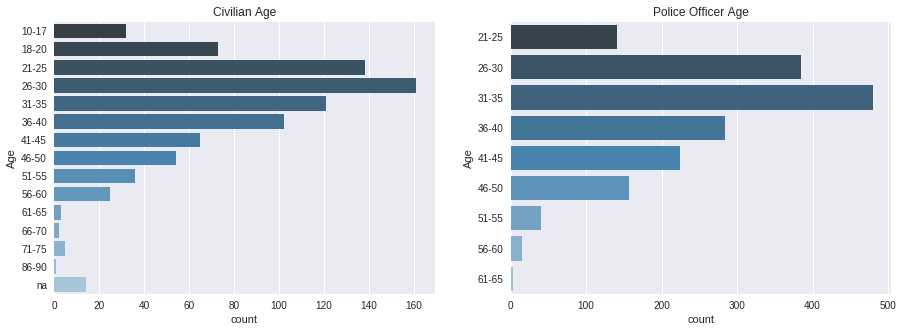

In [74]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(y=civs['Age'].sort_values(), palette='Blues_d')
plt.title('Civilian Age')

plt.subplot(1,2,2)
sns.countplot(y=officers['Age'].sort_values(), palette='Blues_d')
plt.title('Police Officer Age')

### Incidents by County

*Respective notebook: `incidents_by_county.ipynb`*

- A total of 50 out of 58 counties in California reported at least one (1) incident of use of force. 
    - 23 counties reported five (5) or more incidents of UoF
- The top 10 counties with the highest number of incidents are the following:

| County                | # of incidents |
|-----------------------|----------------|
| **Los Angeles County**    | 212            |
| **San Bernardino County** | 71             |
| **Orange County**         | 61             |
| **Riverside County**      | 60             |
| **San Diego County**      | 49             |
| **Kern County**           | 36             |
| **Contra Costa County**   | 27             |
| **Fresno County**         | 26             |
| **Santa Clara County**    | 24             |
| **San Joaquin County**    | 23             |

#### Incidents Resulting in Death

- Nearly **20%** (157) of civilians who were involved in incidents of UoF died.

Of the top 10 counties with the highest number of incidents, San Joaquin, Los Angeles and Riverside had the highest death rates.

| County                | death rate (%) |
|-----------------------|----------------|
| **San Joaquin County**    | 30.434783      |
| **Los Angeles County**    | 25.943396      |
| **Riverside County**      | 21.666667      |
| **Orange County**         | 19.672131      |
| **San Diego County**      | 18.367347      |
| **Fresno County**         | 15.384615      |
| **Contra Costa County**   | 14.814815      |
| **Kern County**           | 13.888889      |
| **San Bernardino County** | 12.676056      |
| **Santa Clara County**    | 8.333333       |

In San Joaquin County, nearly a third of use of force incidents resulted in death, while LA and Riverside County had almost equally high rates, **26%** and **22%** respectively.

In [85]:
top_10 = pd.read_pickle('./dataframes/top_10_counties.pkl')
top_10

,# of incidents,% of total UoF incidents,Population,% of total pop,% difference,# of deaths,death rate (%)
Los Angeles County,212,27.109974,10182961,25.984210,1.125765,55,25.943396
San Bernardino County,71,9.079284,2135724,5.449800,3.629484,9,12.676056
Orange County,61,7.800512,3172152,8.094489,-0.293977,12,19.672131
Riverside County,60,7.672634,2348213,5.992015,1.680619,13,21.666667
San Diego County,49,6.265985,3286717,8.386828,-2.120843,9,18.367347
Kern County,36,4.603581,886803,2.262886,2.340695,5,13.888889
Contra Costa County,27,3.452685,1126824,2.875355,0.577330,4,14.814815
Fresno County,26,3.324808,985079,2.513660,0.811148,4,15.384615
Santa Clara County,24,3.069054,1922619,4.906013,-1.836959,2,8.333333
San Joaquin County,23,2.941176,735677,1.877252,1.063924,7,30.434783


### Incidents involving civilians with irregular mental status

- 40% (330) of civilians involved showed some sign of irregular mental status
    - 69% (228) of these civilians showed signs of alcohol/drug impairment
    - 31% (102) of these civilians involved showed signs of mental disability* 


 **(some of these cases may also include showing signs of alcohol/drug impairment)*



| CIVILIAN_Mental_Status                                                                  | # of Incidents |
|-----------------------------------------------------------------------------------------|-------|
| **Signs of drug impairment**                                                                | 125   |
| **Signs of alcohol impairment**                                                             | 72    |
| **Signs of mental disability**                                                              | 56    |
| **Signs of drug impairment, Signs of alcohol impairment**                                   | 31    |
| **Signs of mental disability, Signs of drug impairment**                                    | 30    |
| **Signs of mental disability, Signs of drug impairment, Signs of alcohol impairment**       | 7     |
| **Signs of mental disability, Signs of alcohol impairment**                                 | 5     |
| **Signs of developmental disability**                                                       | 2     |
| **Signs of mental disability, Signs of developmental disability, Signs of drug impairment** | 1     |
| **Signs of mental disability, Signs of physical disability, Signs of alcohol impairment**   | 1     |

### Mapping

*Respective notebook: `adding_geographic_and_time_data.ipynb`*

#### All Incidents of UoF

In [107]:
%%HTML
<iframe width='100%' height='500' src='./maps/all_incidents_map.html'></iframe>

#### Incidents Resulting in Death

In [95]:
%%HTML
<iframe width='100%' height='500' src='./maps/all_death_map.html'></iframe>

#### Incidents involving civilians with signs of mental disability

In [96]:
%%HTML
<iframe width='100%' height='500' src='./maps/all_map_mental_dis.html'></iframe>

#### Incidents involving civilians with signs of only alcohol or drug impairment

In [108]:
%%HTML
<iframe width='100%' height='500' src='./maps/all_map_alc_drug.html'></iframe>

### Logistic Regression

*Respective notebook: `logistic_regression_civilians.ipynb`*